In [ ]:
# authorize google account to use bigquery
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# authorize drive to pull model
from google.colab import drive
drive.mount('/content/drive')

# pull data for repo from bigquery
project_id = 'uic-capstone-int'
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

Authenticated
Mounted at /content/drive


In [ ]:
import pandas as pd
from tensorflow import keras 

7 Key repos
* arrow
* airflow
* databricks
* mongodb/mongo (108110)
* cwida/duckdb (138754790)
* apache/kafka (2211243)
* apache/beam (50904245)

In [ ]:
#
id=50904245

In [ ]:
#Unique repo id's generated since 2011 (these id's are collected from bigquery to be used in a training loop that we'll be building around the pipeline)
unique_repo_id = pd.read_csv('drive/My Drive/unique_repoid/bq-results-20200929-031543-adwz8kt104m3.csv')

In [ ]:
unique_repo_id

,repoID
0,162717390
1,126280295
2,148454071
3,145031146
4,163648820
...,...
130566817,61124842
130566818,73522395
130566819,41068224
130566820,72488504


In [ ]:
model_withTransfer = keras.models.load_model('drive/Shared drives/IDS 560 - Fall 20/model101.h5')

In [ ]:
# This cell is for data fetching process

#-----------------------Pushes---------------------------------------------------

sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_pushes
FROM
(

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2015
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2016
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2017
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2018
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2019
WHERE type='PushEvent' AND repo.id = {0}
)
GROUP BY 1,2
ORDER BY 1;'''.format(id)
dfPushes=client.query(sql).to_dataframe()




#---------------------------------Forks------------------------------------------

sql='''
    
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_forks
FROM
(

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2015
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2016
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2017
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2018
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2019
WHERE type='ForkEvent' AND repo.id = {0}
)
GROUP BY 1,2
ORDER BY 1;
'''.format(id)
dfForks=client.query(sql).to_dataframe()




#-----------------------------------------Pulls------------------------------------
sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_pulls
FROM
(

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2015
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2016
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2017
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2018
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2019
WHERE type='PullRequestEvent' AND repo.id = {0}
)
GROUP BY 1,2
ORDER BY 1;'''.format(id)
dfPulls=client.query(sql).to_dataframe()



#---------------------------------------Bookmarks-------------------------------------
sql= '''

SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (DISTINCT actorID) number_of_Bookmarks
FROM
(
SELECT created_at as date, repo.id as repoID, actor.id AS actorID
FROM githubarchive.year.2015
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID
FROM githubarchive.year.2016
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID
FROM githubarchive.year.2017
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID
FROM githubarchive.year.2018
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID
FROM githubarchive.year.2019
WHERE type='WatchEvent' AND repo.id = {0}
)
GROUP BY 1,2
ORDER BY 1;'''.format(id)
dfBoomarks = client.query(sql).to_dataframe()






#----------------------------Issues---------------------------------------------
sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_issues
FROM
(

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2015
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2016
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2017
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2018
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID
FROM githubarchive.year.2019
WHERE type='IssueEvent' AND repo.id = {0}
)
GROUP BY 1,2
ORDER BY 1;'''.format(id)
dfIssues=client.query(sql).to_dataframe()






#-------------------------Issuecomments-------------------------------------------

sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, COUNT(*) AS issue_comment_count, COUNT( DISTINCT a_id) as issue_author_count
FROM 
(SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2015
WHERE type = 'IssueCommentEvent' AND repo.id = {0}


UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2016
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

UNION ALL



SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2017
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2018
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2019
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

)
GROUP BY 1,2
ORDER BY 1;'''.format(id)
dfIssuecomment = client.query(sql).to_dataframe()



#---------------------------------------Commitcomments------------------------------------------
sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, COUNT(*) AS commit_comment_count, COUNT( DISTINCT a_id) AS commit_author_count
FROM 
(SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2015
WHERE type = 'CommitCommentEvent' AND repo.id = {0}


UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2016
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

UNION ALL



SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2017
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2018
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, actor.id AS a_id
FROM githubarchive.year.2019
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

)
GROUP BY 1,2
ORDER BY 1;'''.format(id)

dfCommitcomment = client.query(sql).to_dataframe()

In [ ]:
dfPushes

,year_month,repoID,number_of_pushes
0,2016-02-26,50904245,1
1,2016-03-01,50904245,2
2,2016-03-02,50904245,1
3,2016-03-03,50904245,4
4,2016-03-04,50904245,5
...,...,...,...
1170,2020-01-09,50904245,15
1171,2020-01-10,50904245,21
1172,2020-01-11,50904245,3
1173,2020-01-13,50904245,16


In [ ]:
dfForks

,year_month,repoID,number_of_forks
0,2016-02-08,50904245,1
1,2016-02-16,50904245,1
2,2016-02-19,50904245,1
3,2016-02-24,50904245,1
4,2016-02-26,50904245,2
...,...,...,...
1056,2020-01-10,50904245,3
1057,2020-01-11,50904245,1
1058,2020-01-12,50904245,1
1059,2020-01-13,50904245,3


In [ ]:
dfPulls

,year_month,repoID,number_of_pulls
0,2016-02-26,50904245,2
1,2016-02-29,50904245,3
2,2016-03-01,50904245,5
3,2016-03-02,50904245,6
4,2016-03-03,50904245,10
...,...,...,...
1292,2020-01-09,50904245,21
1293,2020-01-10,50904245,24
1294,2020-01-11,50904245,8
1295,2020-01-13,50904245,31


In [ ]:
dfBoomarks

,year_month,repoID,number_of_Bookmarks
0,2016-02-04,50904245,1
1,2016-02-05,50904245,2
2,2016-02-07,50904245,2
3,2016-02-09,50904245,3
4,2016-02-10,50904245,1
...,...,...,...
1179,2020-01-10,50904245,2
1180,2020-01-11,50904245,2
1181,2020-01-12,50904245,1
1182,2020-01-13,50904245,3


In [ ]:
dfIssuecomment

,year_month,repoID,issue_comment_count,issue_author_count
0,2016-02-26,50904245,2,2
1,2016-02-27,50904245,2,2
2,2016-02-29,50904245,2,2
3,2016-03-01,50904245,8,5
4,2016-03-02,50904245,4,3
...,...,...,...,...
1336,2020-01-10,50904245,87,30
1337,2020-01-11,50904245,20,11
1338,2020-01-12,50904245,5,3
1339,2020-01-13,50904245,106,29


In [ ]:
dfIssues

,year_month,repoID,number_of_issues


In [ ]:
dfCommitcomment

,year_month,repoID,commit_comment_count,commit_author_count
0,2016-03-16,50904245,1,1
1,2016-03-17,50904245,2,2
2,2016-04-29,50904245,1,1
3,2016-05-02,50904245,1,1
4,2016-05-24,50904245,1,1
...,...,...,...,...
97,2019-11-09,50904245,1,1
98,2019-11-14,50904245,1,1
99,2019-12-03,50904245,1,1
100,2019-12-04,50904245,1,1


In [ ]:
merge1 = pd.merge(dfPushes,dfForks,how='outer', on='year_month')
merge2 = pd.merge(merge1, dfPulls, how='outer', on='year_month')
merge3 = pd.merge(merge2, dfBoomarks, how='outer', on='year_month')
merge4 = pd.merge(merge3, dfIssuecomment, how='outer', on='year_month')
merge5 = pd.merge(merge4,dfCommitcomment,how='outer',on='year_month')
merge6 = pd.merge(merge5, dfIssues, how='outer',on='year_month')
merge6.drop(['repoID_x','repoID_y'], axis=1, inplace=True)
merge6.drop('repoID', axis=1, inplace=True)
merge6.sort_values(by='year_month',ascending=True,inplace=True)
merge6

,year_month,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues
1335,2016-02-04,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1336,2016-02-05,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1337,2016-02-07,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1175,2016-02-08,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1338,2016-02-09,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1171,2020-01-10,21.0,3.0,24.0,2.0,87.0,30.0,NaN,NaN,NaN
1172,2020-01-11,3.0,1.0,8.0,2.0,20.0,11.0,NaN,NaN,NaN
1281,2020-01-12,NaN,1.0,NaN,1.0,5.0,3.0,NaN,NaN,NaN
1173,2020-01-13,16.0,3.0,31.0,3.0,106.0,29.0,NaN,NaN,NaN


In [ ]:
merge6['year_month']=pd.to_datetime(merge6['year_month'])
merge6.rename({'year_month': 'datetime'}, axis=1, inplace=True)
merge6.index=merge6['datetime']
merge6.drop('datetime',axis=1,inplace=True)
merge6

,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues
datetime,,,,,,,,,
2016-02-04,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2016-02-05,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2016-02-07,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2016-02-08,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-09,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-01-10,21.0,3.0,24.0,2.0,87.0,30.0,NaN,NaN,NaN
2020-01-11,3.0,1.0,8.0,2.0,20.0,11.0,NaN,NaN,NaN
2020-01-12,NaN,1.0,NaN,1.0,5.0,3.0,NaN,NaN,NaN


In [ ]:

#This step is for padding the dataframe to maintain the consistency of all the time series we'll be fetching in the future
#This step also deals with the problem of missing dates(if no event happens at all) in the time series
from datetime import datetime
now=datetime.now()
today = now.strftime("%Y-%m-%d")
today

idx = pd.date_range('2016-01-01', today)
merge6.index = pd.DatetimeIndex(merge6.index)

merge6 = merge6.reindex(idx, fill_value=0)

In [ ]:
merge6

,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues
2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#aggregating the weekly data and creating weekly time steps
WeeklyTS = pd.DataFrame()
WeeklyTS = merge6.resample('W').sum()

In [ ]:
WeeklyTS

,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues
2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Summing all the data to get an idea of the frequency of different events
col_sum=WeeklyTS.sum(axis=0)
col_sum.sort_values(ascending=False, inplace=True)

In [ ]:
col_sum

In [ ]:
import matplotlib.pyplot as plt

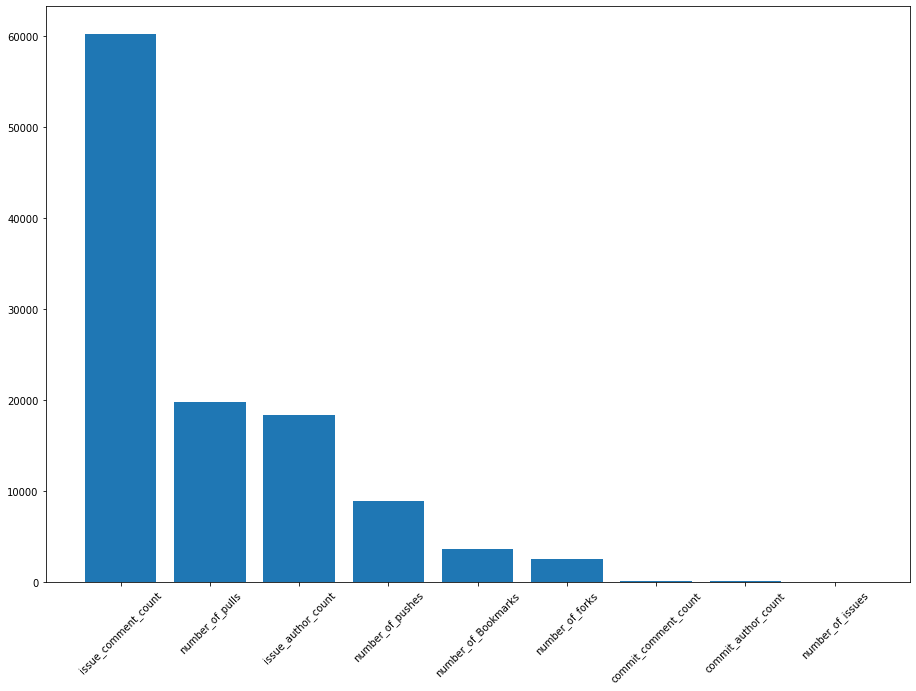

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_axes([0,0,2,2])
ax.bar(col_sum.index,col_sum)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#dimensionality reduction just for the visualization

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(WeeklyTS)
pca_2d = pca.transform(WeeklyTS)

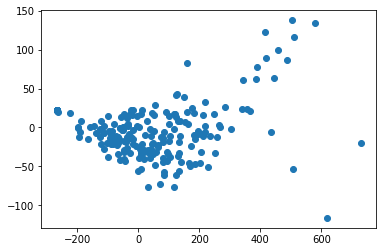

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])

In [ ]:
#clustering just to see any patterns and to create a dummy target variable

from sklearn.cluster import KMeans
Kmeansmodel = KMeans(n_clusters=2)
Kmeansmodel.fit(pca_2d)
y_kmeans = Kmeansmodel.predict(pca_2d)

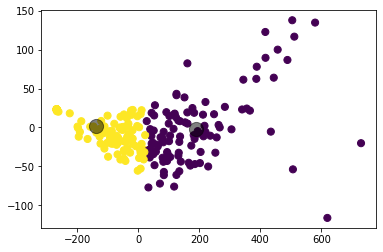

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = Kmeansmodel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#Just adding a dummy target variable for testing
WeeklyTS['status']=Kmeansmodel.labels_
WeeklyTS['status'].value_counts()

1    144
0    105
Name: status, dtype: int64

In [ ]:
#-------------Pending tasks-------------------------
#Test for seasonality and Trends in the TS
#Dicky fuller test for stationarity




In [ ]:
#seperating date feature into 'year','month', and 'day' features
WeeklyTS.insert(0, 'year', WeeklyTS.index.year)
WeeklyTS.insert(1, 'month', WeeklyTS.index.month)
WeeklyTS.insert(2, 'day', WeeklyTS.index.day)
WeeklyTS.reset_index(level=0, inplace=True)

In [ ]:
WeeklyTS.drop('index', axis=1, inplace=True)
WeeklyTS

,year,month,day,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,status
0,2016,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2016,1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2016,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2016,1,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2016,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020,9,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
245,2020,9,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
246,2020,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
247,2020,9,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# yet to be performed - Normalization of the above dataset





In [ ]:
# multivariate data preparation

from numpy import array
from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# end of the pattern
		end_ix = i + n_steps
		# check if surpaas the dataset
		if end_ix > len(sequences):
			break
		# input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

# define input sequence
t=[]

# transforming each column to an array
for i in range(0,len(WeeklyTS.columns)):
  t.append(WeeklyTS.iloc[:,i].to_numpy())

# convert array to [rows, columns] structure
for i in range(0,len(WeeklyTS.columns)):
  t[i]=t[i].reshape((len(t[i]),1))



# horizontally stack columns
dataset=t[0]
for i in range(1,len(WeeklyTS.columns)):
  dataset = hstack((dataset,t[i]))

# Window Size
n_steps = 5

# convert into input/output
X, y = split_sequences(dataset, n_steps)
n_features = X.shape[2]
print(X.shape, y.shape)

# output
for i in range(len(X)):
	print(X[i], y[i])

(245, 5, 12) (245,)
[[2.016e+03 1.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 1.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 2.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 3.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]] 1.0
[[2.016e+03 1.000e+00 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 1.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 2.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
#Vanilla model
def build_LSTM(n_steps, hidden_units):
      model = Sequential()
      model.add(LSTM(hidden_units, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
      model.add(LSTM(hidden_units, activation='relu'))
      model.add(Dense(n_features))
      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
      return model

In [ ]:

# model_withTransfer = build_LSTM(5, 20)
# model_withTransfer.save('drive/Shared drives/IDS 560 - Fall 20/model101.h5')
# history=model.fit(X, y, epochs=400, verbose=0)

# # accuracy plot
# fig = plt.figure()
# fig.patch.set_facecolor('white')
# plt.plot(history.history['accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train accuracy'], loc='upper right')
# plt.show()
# model_withTransfer.save("model101")

In [ ]:
#  loss plot
# fig = plt.figure()
# fig.patch.set_facecolor('white')
# plt.plot(history.history['loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train loss'], loc='upper right')
# plt.show()

In [ ]:
# saving model weights for the weights initialization in the next cycle 
# model.save_weights('weights.h5',)

In [ ]:
def FitForecast(X_train, y_train, n_steps,
                hidden_units, 
                epochs, trained_model):
    
    '''
    Fits a model and returns the model and history
    Args:
        X_train: input dataset for training
        y_train: output dataset for training
        n_steps: window size
        hidden_units: int/list specifying the number 
                      of hidden units
        epochs: int that defines the number of 
                training phases through the
                training dataset
        trained_model: already trained keras sequential 
                       model
        
    Returns:
        model: keras sequential model
        history: training loss history and training accuracy history
        
    '''
    model = build_LSTM(n_steps,hidden_units)
    model.summary()
    #initializing with the previous model weights
    model.set_weights(weights = trained_model.get_weights())        
    
    history = model.fit(x=X_train, y=y_train, 
                epochs=epochs, verbose=0,
                shuffle=False)

    return model, history

In [ ]:
model_withTransfer, hist = FitForecast(X, y, 5, 20, 600, trained_model=model_withTransfer)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 20)             2640      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                252       
Total params: 6,172
Trainable params: 6,172
Non-trainable params: 0
_________________________________________________________________


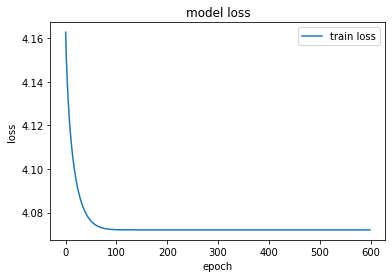

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper right')
plt.show()

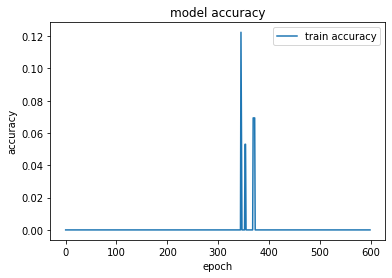

In [ ]:
# accuracy plot
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy'], loc='upper right')
plt.show()

In [ ]:
# Saving model to be picked up in the next cycle for transfer learning
keras.models.save_model(model_withTransfer,'drive/Shared drives/IDS 560 - Fall 20/model101.h5')